In [104]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [105]:
data = pd.read_fwf("auto-mpg.data", na_values='?')

In [106]:
data.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

In [107]:
data.set_index('car name')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
"""buick skylark 320""",15.0,8,350.0,165.0,3693.0,11.5,70,1
"""plymouth satellite""",18.0,8,318.0,150.0,3436.0,11.0,70,1
"""amc rebel sst""",16.0,8,304.0,150.0,3433.0,12.0,70,1
"""ford torino""",17.0,8,302.0,140.0,3449.0,10.5,70,1
"""ford galaxie 500""",15.0,8,429.0,198.0,4341.0,10.0,70,1
...,...,...,...,...,...,...,...,...
"""ford mustang gl""",27.0,4,140.0,86.0,2790.0,15.6,82,1
"""vw pickup""",44.0,4,97.0,52.0,2130.0,24.6,82,2
"""dodge rampage""",32.0,4,135.0,84.0,2295.0,11.6,82,1


In [108]:
print(data.head(5))

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  15.0          8         350.0       165.0  3693.0          11.5   
1  18.0          8         318.0       150.0  3436.0          11.0   
2  16.0          8         304.0       150.0  3433.0          12.0   
3  17.0          8         302.0       140.0  3449.0          10.5   
4  15.0          8         429.0       198.0  4341.0          10.0   

   model year  origin              car name  
0          70       1   "buick skylark 320"  
1          70       1  "plymouth satellite"  
2          70       1       "amc rebel sst"  
3          70       1         "ford torino"  
4          70       1    "ford galaxie 500"  


<AxesSubplot:>

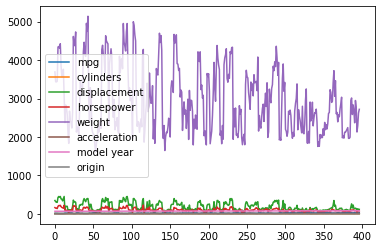

In [109]:
data.plot()

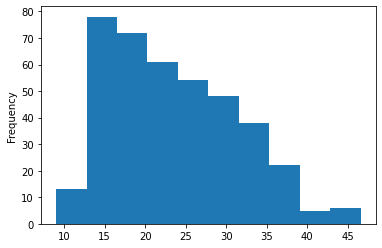

In [110]:
data['mpg'].plot.hist();

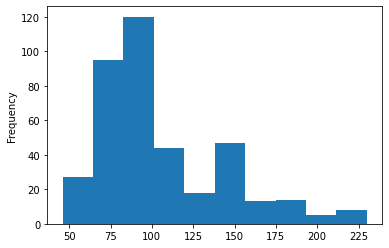

In [115]:
data['horsepower'].plot.hist();

In [119]:
data.origin.value_counts()

1    248
3     79
2     70
Name: origin, dtype: int64

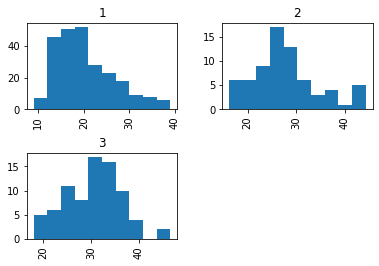

In [120]:
axs = data.hist(column='mpg', by='origin')

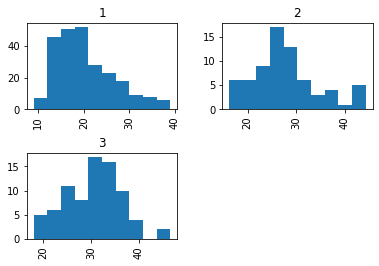

In [141]:
axs = data.hist(column='mpg', by='origin')
# axs[1].set(title='female', ylim=[0, 45])
# axs[2].set(title='male', ylim=[0, 45])
# axs[3].set(title='water', ylim=[0,45]);

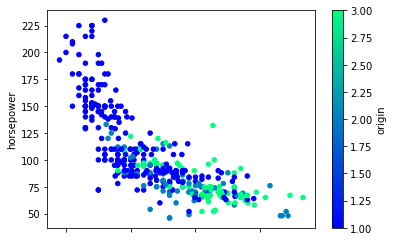

In [134]:
data.plot.scatter('mpg', 'horsepower', c='origin', colormap='winter');

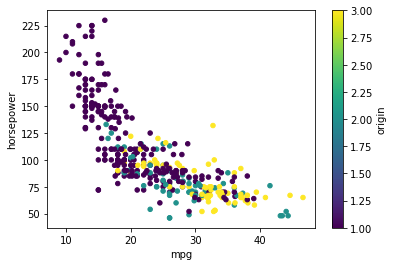

In [132]:
fig, ax = plt.subplots()
data.plot.scatter('mpg', 'horsepower', c='origin', colormap='viridis', ax=ax);

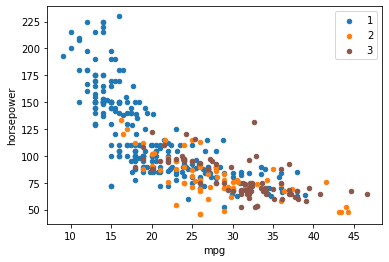

In [68]:
colors = {1: 'tab:blue', 2: 'tab:orange', 3: 'tab:brown'}
fig, ax = plt.subplots()
for key, group in data.groupby(by='origin'):
    group.plot.scatter('mpg', 'horsepower', c=colors[key], label=key, ax=ax);

In [69]:
import seaborn as sns

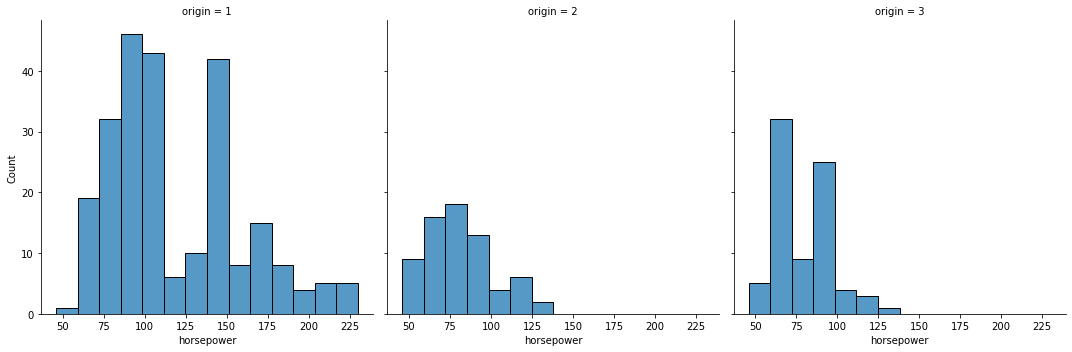

In [70]:
sns.displot(x='horsepower', col='origin', data=data);

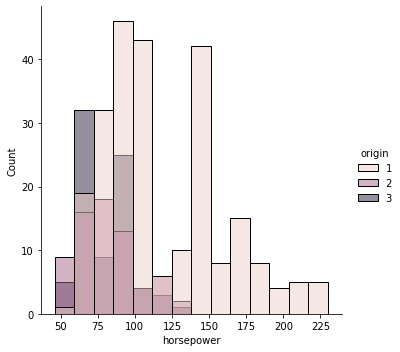

In [71]:
sns.displot(x='horsepower', hue='origin', data=data);

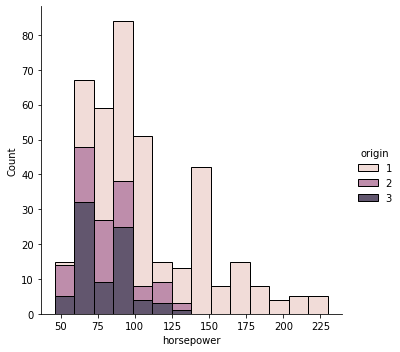

In [72]:
sns.displot(x='horsepower', hue='origin', data=data, multiple='stack');

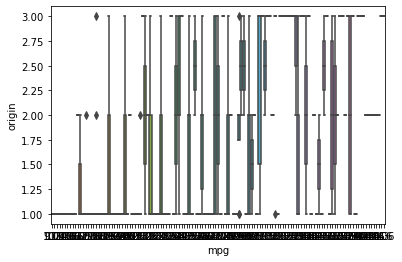

In [74]:
sns.boxplot(x='mpg', y='origin', data=data);

In [87]:
data['origin_str'] = data['origin'].replace([1,2,3], ['one', 'two', 'three'])
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,origin_str
0,15.0,8,350.0,165.0,3693.0,11.5,70,one,"""buick skylark 320""",one
1,18.0,8,318.0,150.0,3436.0,11.0,70,one,"""plymouth satellite""",one
2,16.0,8,304.0,150.0,3433.0,12.0,70,one,"""amc rebel sst""",one
3,17.0,8,302.0,140.0,3449.0,10.5,70,one,"""ford torino""",one
4,15.0,8,429.0,198.0,4341.0,10.0,70,one,"""ford galaxie 500""",one
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790.0,15.6,82,one,"""ford mustang gl""",one
393,44.0,4,97.0,52.0,2130.0,24.6,82,two,"""vw pickup""",two
394,32.0,4,135.0,84.0,2295.0,11.6,82,one,"""dodge rampage""",one
395,28.0,4,120.0,79.0,2625.0,18.6,82,one,"""ford ranger""",one


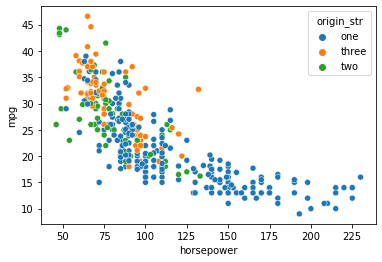

In [88]:
ax = sns.scatterplot(x='horsepower', y='mpg', data=data, hue='origin_str')

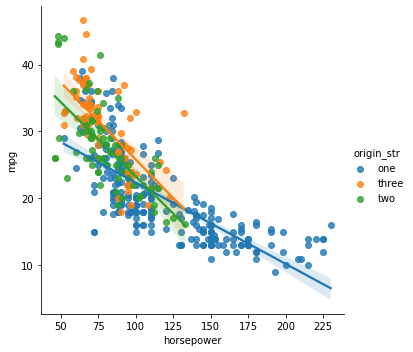

In [89]:
ax = sns.lmplot(x='horsepower', y='mpg', data=data, hue='origin_str')

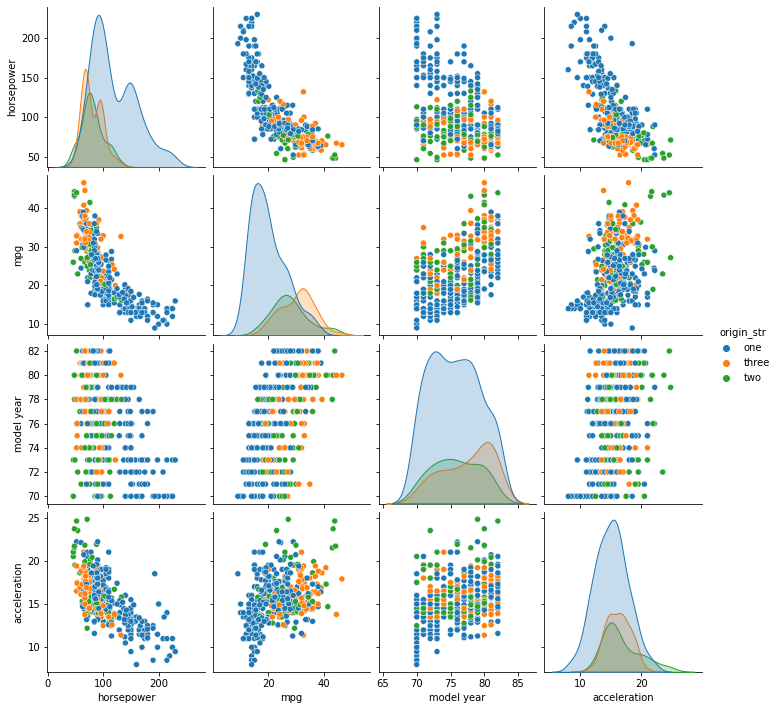

In [90]:
sns.pairplot(data, vars=['horsepower', 'mpg', 'model year', 'acceleration'], hue='origin_str');

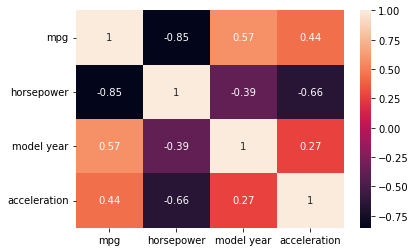

In [91]:
g = sns.heatmap(data[['mpg', 'horsepower', 'model year', 'acceleration']].corr(method='spearman'), 
            annot=True)